In [2]:
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100,
                  centers=2,
                  cluster_std=3.5,
                  random_state=42)
x.shape, y.shape, x[:4], y[:4]

((100, 2),
 (100,),
 array([[-4.18630746,  8.36447971],
        [ 8.43055819,  5.66147687],
        [-4.41453716,  9.40251519],
        [ 7.5170894 ,  8.61194512]]),
 array([0, 1, 0, 1]))

In [4]:
y=y * 2.0 -1
y[:10]

array([-1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.])

In [5]:
np.random.seed(42)
w= np.random.rand(2,)
b= np.random.rand()
w,b

(array([0.37454012, 0.95071431]), 0.7319939418114051)

In [6]:
def predict(x,w,b):
    m=x.shape[0]
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = np.dot(w, x[i]) + b
    y_pred = np.sign(y_pred)
    return y_pred

In [7]:
predict(x, w, b)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.])

In [8]:
predict(x[:10], w, b)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
def plot_train_predict(x,y,w,b):

  xlim = np.array([x[:,0].min()-1, x[:,0].max()+1])
  ylim = np.array([x[:,1].min()-1, x[:,1].max()+1])


  plt.figure(figsize=(4,3))
  plt.scatter(x[:,0], x[:,1], c=y)
  plt.title("y_train")
  plt.xlim(xlim[0], xlim[1])
  plt.ylim(ylim[0], ylim[1])

  plt.figure(figsize=(4,3))
  y_pred = predict(x,w,b)


  plt.scatter(x[:,0], x[:,1],c=y_pred)
  plt.title("y_pred")
  plt.xlim(xlim[0], xlim[1])
  plt.ylim(ylim[0], ylim[1])


  xx= xlim
  # positive marginal plane line :--> yyn
  yyn = (-1 -b -(w[0]*xx)) / w[1]
  # negative marginal plane line :--> yyp
  yyp = (1 -b -(w[0]*xx)) / w[1]
  # hyperpalane line
  yym = (-b - (w [0] * xx))/ w[1]


  plt.plot(xx, yyn, color="red", linestyle="--")
  plt.plot(xx, yyp, color="blue", linestyle="--")
  plt.plot(xx, yym, color="black")
  plt.show()

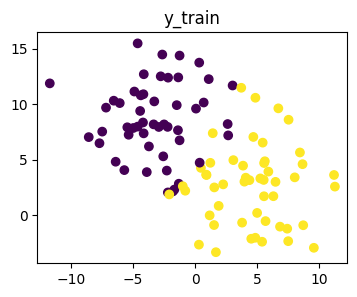

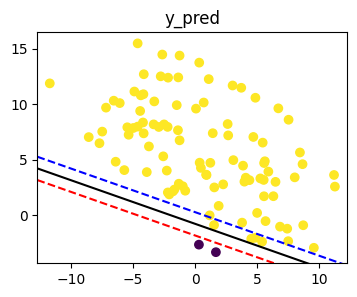

In [11]:
plot_train_predict(x,y,w,b)

In [21]:
def hinge_loss(x_i, y_i, w,b):
   return max(0, 1-y_i * (np.dot(w, x[i]) + b))

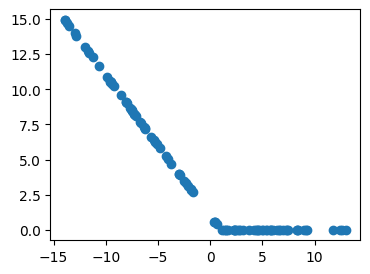

In [23]:
n=100
t =  np.zeros(n)
loss = np.zeros(n)

for i in range(n):
  t[i] = y[i] * (np.dot(w, x[i]) +b)
  loss[i] = hinge_loss(x[i], y[i], w, b)


plt.figure(figsize=(4,3))
plt.scatter(t, loss)
plt.show()

##Claculate the cost

In [36]:
def cost(x, y, w, b, c=1):
  m=x.shape[0]

  margin_cost = (np.dot(w, w)**2) / 2

  hinge_cost = 0
  for i in range(m):
     loss_i  = hinge_loss(x[i], y[i], w, b)
     hinge_cost +=loss_i
  hinge_cost *= c


  total_cost = margin_cost + hinge_cost
  return total_cost

In [37]:
cost(x, y, w, b)

429.96131347521913

## Gradient

In [42]:
def gradient(x, y, w, b, c=1):
  n=x.shape[1]
  m=x.shape[0]

  G_w = np.zeros(n)
  G_b = 0.

  for i in range(m):
    hinge_loss = (1-y[i] * (np.dot(w, x[i]) + b)) > 0
    if hinge_loss:
      G_w += w-(c * y[i] * x[i])
      G_b += -c * y[i]
    else:
      G_w += w

  return G_w, G_b

In [43]:
G_w, G_b  = gradient(x, y, w, b)
G_w, G_b

(array([-140.17224695,  537.4465191 ]), 44.0)

In [47]:
alpha = 0.001
w_new = w - alpha *G_w
b_new = b - alpha *G_b


print(cost(x,y,w,b))
print(cost(x,y,w_new, b_new))

429.96131347521913
189.67938894823112


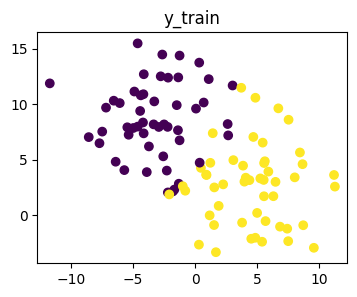

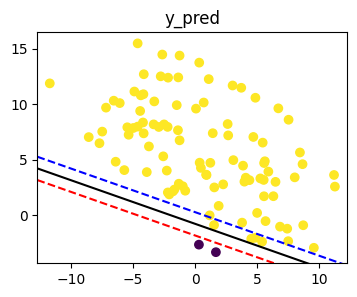

In [48]:
plot_train_predict(x,y,w,b)

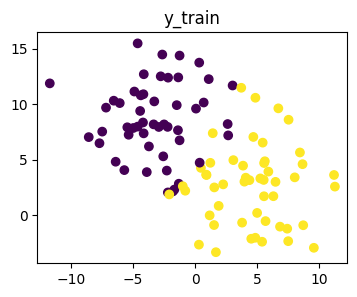

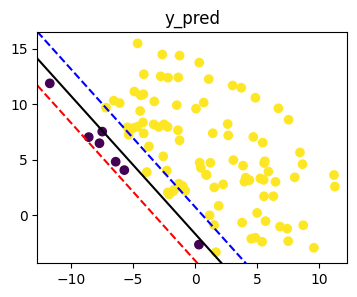

In [49]:
plot_train_predict(x,y,w_new,b_new)